In [26]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np
import itertools
# Plotting library
#from matplotlib import pyplot
import matplotlib.pyplot as plt 
import math 
# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat


from random import randrange
# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [27]:
class Point:
    RRHsum=0
    def __init__(self, x,  y):
        self.x = x
        self.y = y
    
"""  
class pos_Obj:
    def __init__(self, RB,  Conn):
        self.RB = RB
        self.Conn = Conn
"""

    

  


'  \nclass pos_Obj:\n    def __init__(self, RB,  Conn):\n        self.RB = RB\n        self.Conn = Conn\n'

## Generating the RRH and users

In [28]:


#n= total number of users
# m = total number of RRH 
def generateUser_RRH(n,m):
    #n=5
    #m=15
    users = [Point(0,0) for i in range(n)]
    for user in users:
        user.x= randrange(50)
        user.y=randrange(50)
        #print(user.x , user.y)

    rrhs= [Point(0,0) for i in range(m)]
    """
    for rrh in rrhs:
        rrh.x= randrange(10)
        rrh.y=randrange(10)
    """
    #print("RRHs")
    counter=0
    flag= True
    while counter< len(rrhs):
        p = Point(0,0)
        p.x= randrange(50)
        p.y=randrange(50)
        #to avoid repitition in points
        for user in users:
            if(p.x== user.x and p.y== user.y):
                flag= False
                break
        if(flag):
            rrhs[counter].x= p.x
            rrhs[counter].y=p.y
            #print(rrhs[counter].x , rrhs[counter].y)
            counter= counter +1

        flag=True
    return users, rrhs


       



## Calculate all RB values 
- This function calculates all Rb values for all connections between users and rrhs and returns a matrix containing the number of resource blocks for all connections

In [29]:
def RbValuesMatrix(n,m,users, rrhs):
    RRHvalues= np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            
            distance = math.sqrt((users[i].x - rrhs[j].x)**2 + (users[i].y - rrhs[j].y)**2)
            S = 5 - (10*math.log(25 ,10))+ 60 - (20*math.log(2350,10)) - (30*math.log(distance,10)) - (6*(distance/5)+30) + 28
            N= -174+ (10*math.log(180000,10))
            sub = (S-N)-30
            C = 180000*math.log(1+pow(10,(sub/10)),2)
            Rb = 2000000 / C

            """ updating matrix values"""

            RRHvalues[i][j]= RRHvalues[i][j]+math.ceil(Rb)
    return RRHvalues
            


## Generating random sol for Genetics Algorithm
- This function is used to generate an initial valid random solution 

In [30]:
def randconn(N,M,users,rrhs, Q , RRHvalues):
    flag=True
    """initializing the two matrices of connections and RRH sum"""
    
    x = np.zeros((N,M))
    RRHsum = np.zeros((N,M))
    
    for k in range(N):
        """random index to put the 1 in the users row"""
        
        index = np.random.randint(0,M-1)
      
       
        """ updating matrix values"""
        
        
        RRHsum[k][index] = RRHvalues[k][index]
        x[k][index] = 1
        
        """ Checking whether the column sum value in RRh sum matrix is greater than Q RB.. if true the function returns flag=False
            and this matrix won't be used. and the method is called again to generate another valid matrix
        """
        if RRHsum.sum(axis=0)[index] >Q:
            
            flag=False
            break
        
        
        #x = np.zeros((N,M))
        
       
    
    return x,RRHsum, flag


## crossover function
- This function is used in genetics algorithm to perform the crossover. It takes 2 matrices of connections then performs crossover and gets the rb matrices of the new connection matrices. It returns 2 matrices of rb

In [31]:
def crossover(conn,conn2,num , RRhvalues):
    #some usefull variables
    
    #cutoff = int(RRHsum.shape[0]/num)
    #print(cutoff)
    cutoff=num
    
    
    final = np.zeros(conn.shape,dtype= int)
    final2 = np.zeros(conn2.shape,dtype = int)
    #cutting it for crossover
    
    firstcut1 = conn[0:cutoff,:]
    #print(firstcut1.shape)
    firstcut2 = conn[cutoff:,:]
    #print(firstcut2.shape)
    
    secondcut1 = conn2[0:cutoff,:]
    #print(secondcut1.shape)
    secondcut2 = conn2[cutoff:,:]
    #print(secondcut2.shape)
    

    final[0:cutoff,:] = secondcut1
    #print(firstcut2.shape)
    #print(final[0:cutoff,:].shape)
    final[cutoff:,:] = firstcut2
    
    final2[0:cutoff,:] = firstcut1
    final2[cutoff:,:] = secondcut2
    
    mat_1=np.zeros(conn.shape,dtype= int)
    mat_2=np.zeros(conn.shape,dtype= int)
    
    """
    for i in range(conn.shape[0]) :
        for j in range(conn.shape[1] ):
            if(final[i][j]==1):
                mat_1[i][j]= RRhvalues[i][j]
                
    for i in range(conn.shape[0]) :
        for j in range(conn.shape[1] ):
            if(final2[i][j]==1):
                mat_2[i][j]= RRhvalues[i][j]
    
    """
    mat_1= np.multiply(final,RRhvalues)
    mat_2=np.multiply(final2,RRhvalues)
    
    print("crossover result mat1:")
    print( final)
    print("crossover result mat2:")
    print( final2)
    
    return mat_1,mat_2

In [32]:
# maximum number of itterations here is 5 itterations
def geneticsAlg(n,m, Q,users,rrhs):
    
    
    RRhvalues = RbValuesMatrix(n,m,users, rrhs)
    print("RRHvalues matrix containing all rb values:")
    print(RRhvalues)

    """loop to generate the valid matrix for genetics algorithm"""

    """ Matrix_1"""

    loop= False
    while loop==False:
        conn1,rrhSum1,flag = randconn(n,m,users,rrhs, Q , RRhvalues )
        loop=flag

    """ Matrix_2"""

    loop= False
    while loop==False:
        conn2,rrhSum2,flag2 = randconn(n,m,users,rrhs, Q , RRhvalues )
        loop=flag2

    print("initial valid solution 1:")
    print(conn1)
    print("initial valid solution 2:")
    print(conn2)
    
    # note rrhSum1 and rrhSum2 matrix contain the Rbs values so all you need is sum up all the used RBs in all culomns
    #we will start by comparing between RBs in initial sols

    current_Matrix=rrhSum1
    current_sum=np.sum(rrhSum1)
    #compare between initial solutions
    if(np.sum(rrhSum2)<current_sum):
        current_sum =np.sum(rrhSum2)
        current_Matrix= rrhSum2
    print("current sum",current_sum )
    

    #loop to generate the solutions from the initial solutions through crossover functions with different cutoff values

    for i in range(1,int(rrhSum1.shape[0]/2)+2):
        sol1,sol2 = crossover(conn1,conn2,i , RRhvalues) #sol1 &sol2 contain the values of Rbs from new connection matrices
        #check validity: this part checks whether any sum of the columns of sol1,2 matrices is greater than Q or not
        sum1 =max(np.sum(sol1,axis=0)) #sums the columns and puts them in an array of sum1. then gets max value
        sum2 =max(np.sum(sol2 ,axis=0))


        new_matrices= [] #contains only the valid matrices from sol1,2
        if(sum1<=Q and sum2<=Q):
            new_matrices= [sol1, sol2]


        elif(sum1<=Q):
            new_matrices= [sol1]

        elif(sum2<=Q):
            new_matrices= [sol2]


        #print("The matrices",new_matrices)
        sums=[] #contains the sums of all RBs in sol1,2
        for count in range(len(new_matrices)) :
            sums.append(np.sum(new_matrices[count]) )


        print("The sum",sums)
        #loop to compare the current_sum with the sums of the generated matrix
        for j in range(len(new_matrices)):

            if(sums[j]<current_sum):
                current_sum =sums[j]
                current_Matrix=new_matrices[j]
        if i==5 :
            break


    print("Sum of the used matrix",current_sum)
    print("The used matrix" )
    print(current_Matrix)
    return current_sum  , current_Matrix


    

### note : 
- when you implement genetics algorithm you need to check after cross over on each matrix's RRHs to know whether it is less than Q or not . If not, then this is an invalid solution
- if you make sure it is valid. calculate the total number of resource blocks used in this matrix
- in the end you need to compare all the valid solutions Rb values to know which is the best matrix. just compare it with the least too far. The least sum is represented in (current_Matrix , current_sum)


### note:
- an empty sum array in the result means that the matrix wasn't valid

In [35]:
#current_sum  , current_Matrix =geneticsAlg(10,5,20)
#current_sum  , current_Matrix =geneticsAlg(10,5,20)
#current_sum  , current_Matrix =geneticsAlg(10,5,20)
np.set_printoptions(suppress=True)

n=20 
m=10
users, rrhs = generateUser_RRH(n,m)
current_sum1  , current_Matrix1 =geneticsAlg(n,m,100, users,rrhs)

n=30 
m=10
users, rrhs = generateUser_RRH(n,m)
current_sum2  , current_Matrix2 =geneticsAlg(n,m,100, users,rrhs)
"""



#I was going to use these but they need very large Q to get to the initial valid solution
n=40 
m=10
users, rrhs = generateUser_RRH(n,m)
current_sum3  , current_Matrix3 =geneticsAlg(n,m,400, users,rrhs)

n=50 
m=10
users, rrhs = generateUser_RRH(n,m)
current_sum4  , current_Matrix4 =geneticsAlg(n,m,45, users,rrhs)

n=60 
m=10
users, rrhs = generateUser_RRH(n,m)
current_sum5  , current_Matrix5 =geneticsAlg(n,m,45, users,rrhs)

"""



RRHvalues matrix containing all rb values:
[[      2.    5073.      37.      19.     116.      17.       2.     141.
     1218.      10.]
 [ 117755.      11.    9119.       2.       2.     119.  207770.       7.
        2.      10.]
 [1854994.     265.   17311.       8.       4.     276. 3502823.     199.
        8.      34.]
 [   3332.      10.     495.       1.       1.       9.    6301.       3.
        2.       2.]
 [   4914.       2.   24479.       2.       2.     434.    7080.       1.
        1.      22.]
 [      2.   22727.   24652.    2968.   12176.   12730.       1.    1089.
    27583.    5154.]
 [      2.     377.     537.      11.      43.      91.       2.      13.
      174.      23.]
 [      3.      34.    3676.       8.      18.     338.       3.       4.
       29.      45.]
 [      2.     129.   11820.      45.     130.    1658.       2.       8.
      174.     276.]
 [   2194.  133560.       1.      14.      65.       1.    6059.    7857.
     4411.       2.]
 [   24

initial valid solution 1:
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 

'\n\n\n\n#I was going to use these but they need very large Q to get to the initial valid solution\nn=40 \nm=10\nusers, rrhs = generateUser_RRH(n,m)\ncurrent_sum3  , current_Matrix3 =geneticsAlg(n,m,400, users,rrhs)\n\nn=50 \nm=10\nusers, rrhs = generateUser_RRH(n,m)\ncurrent_sum4  , current_Matrix4 =geneticsAlg(n,m,45, users,rrhs)\n\nn=60 \nm=10\nusers, rrhs = generateUser_RRH(n,m)\ncurrent_sum5  , current_Matrix5 =geneticsAlg(n,m,45, users,rrhs)\n\n'

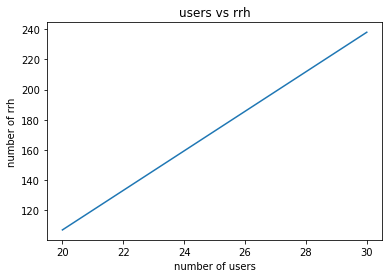

In [36]:
# x axis values 
x = [20,30] 
# corresponding y axis values 
y = [current_sum1,current_sum2] 
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('number of users') 
# naming the y axis 
plt.ylabel('number of rrh') 
  
# giving a title to my graph 
plt.title('users vs rrh') 
  
# function to show the plot 
plt.show() 

## Tabu 

## Assumptions
1) We assume generating neighbours by changing only one user at a time

2) Tabu memory size (the size of the tabu list)= 5

3) Tabu Tenure (time length of each solution in the tabu list) = 2 iterations

4) End Criteria: After 12 iterations or solution remains constant 4 iterations

In [18]:
#n total number of users
#m total number of RRH
matrix = rrhSum1

#this is considered an itteration
"""
for i in range(n):#users
    for j in range(m): #rrh
"""

        

NameError: name 'rrhSum1' is not defined

## Some test codes

In [ ]:
class Trial:
   
    def __init__(self, x ,  S=0):
        self.x =x
        self.S= S
    def add(self , sum_A):
        self.S = self.S +sum_A
        print(self.S )
x= Trial(2)
x.add(10)
x.add(100)

y=Trial(3)
x.add(5)
print(x.S)

In [ ]:
sol1 =[[31, 32, 33, 34, 35],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25],
       [26, 27, 28, 29, 30]]
sol2 =[[ 1,  2,  3,  4,  5],
       [36, 37, 38, 39, 40],
       [41, 42, 43, 44, 45],
       [46, 47, 48, 49, 50],
       [51, 52, 53, 54, 55],
       [56, 57, 58, 59, 60]]

"""
Cross over test example
"""
mat =check_valid(sol1,sol2,1215)
print(mat)


In [7]:
a = [[ 1,  2,  3,  4,  5],
       [6, 7, 8, 9, 10],
       [11, 12, 13, 14, 15]]
b= [[ 0,1,0,0,0],[1,0,0,0,0],[0,0,1,0,0]]
np.multiply(a,b)



array([[ 0,  2,  0,  0,  0],
       [ 6,  0,  0,  0,  0],
       [ 0,  0, 13,  0,  0]])